# EDA should be the first step in any data science/machine learning activity. 

In [1]:
import warnings
warnings.filterwarnings("ignore") # is used in Python to suppress warning messages that might appear during code execution.

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline 
#  is a magic command used in Jupyter Notebooks (like in JupyterLab or Google Colab) 
# to make matplotlib plots display directly below the code cell that produces them.

In [3]:
inp = pd.read_csv("bank_marketing_updated_v1.csv")
inp.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# Step 1: Data Cleaning

In [4]:
inp = pd.read_csv("bank_marketing_updated_v1.csv", skiprows=2)
inp.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Dropping customer id column

In [5]:
inp.drop("customerid", axis=1, inplace=True) #axis=1 is for columns.  inplace=true changes the default behaviour.
inp.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Divide the jobedu inot job and education

In [6]:
inp["job"] = inp.jobedu.apply(lambda x: x.split(",")[0]) 
inp["education"] = inp.jobedu.apply(lambda x: x.split(",")[1])
inp.drop("jobedu", axis=1,  inplace=True)
inp.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
inp.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Impute/Remove Missing Values

### Types of missing values:

- 1. MCAR: It stands for Missing completely at random. The reason behind the missing value is not dependent on any other features.
- 2. MAR: It stands for Missing at random. The reason behind the missing value may be associated with some other features.
- 3. MNAR: It stands for Missing not at random. There is a specific reason behind the missing value.

In [8]:
# Creating a clean version of your original DataFrame inp0, named inp1, that contains only the rows where
# the age column is NOT missing.
inp1 = inp[~inp.age.isnull()].copy() 
inp1.shape

(45191, 19)

In [9]:
inp1.age.isnull().sum()

0

In [10]:
# Check if any month entries are float (NaN shows as float)
inp1[inp1['month'].apply(lambda x: isinstance(x, float))].head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary


In [11]:
inp1.month.value_counts(normalize=True) # is used to display the relative frequency
# normalize=True → instead of counts, it returns proportions

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [12]:
month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

In [13]:
inp1.month.fillna(month_mode, inplace=True)
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [14]:
inp1.month.isnull().sum()

0

In [15]:
inp1 = inp1[~inp1['response'].isnull()].copy()

In [16]:
inp1.response.isnull().sum()

0

In [17]:
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

# -1 indicate missing values

#### Our Objectives
1. we want the missing values to be ignored in the calculation.
2. simply make it missing
3. replace -1 with NAN
4. All summary statistics -mean, -median etc. we will ignore the missing values.

In [18]:
inp1.loc[inp1.pdays<0, "pdays"] = np.NAN # DataFrame.loc[rows, columns]
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

# Handling Outliers

In [19]:
inp1[['age', 'salary', 'balance']].describe()

,age,salary,balance
count,45161.000000,45161.000000,45161.000000
mean,40.935763,57004.849317,1362.850690
std,10.618790,32087.698810,3045.939589
min,18.000000,0.000000,-8019.000000
25%,33.000000,20000.000000,72.000000
50%,39.000000,60000.000000,448.000000
75%,48.000000,70000.000000,1428.000000
max,95.000000,120000.000000,102127.000000


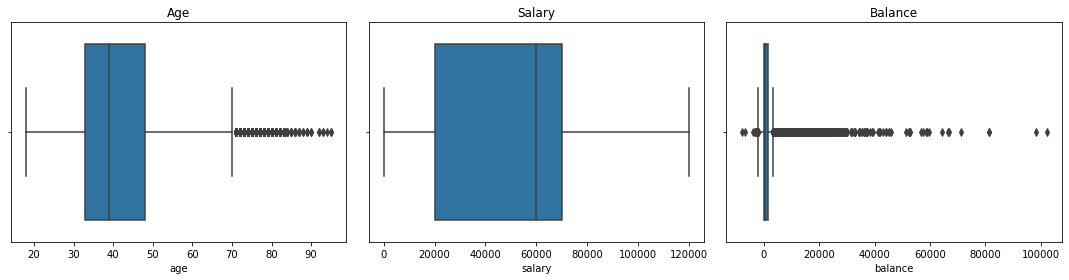

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

sns.boxplot(ax=axes[0], x=inp1['age'])
axes[0].set_title('Age')

sns.boxplot(ax=axes[1], x=inp1['salary'])
axes[1].set_title('Salary')

sns.boxplot(ax=axes[2], x=inp1['balance'])
axes[2].set_title('Balance')

plt.tight_layout()
plt.show()

In [21]:
Q1 = inp1['balance'].quantile(0.25)
Q3 = inp1['balance'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

inp1['balance'] = inp1['balance'].clip(lower, upper)

In [22]:
shift = abs(inp1['balance'].min()) + 1
inp1['balance'] = np.log1p(inp1['balance'] + shift)

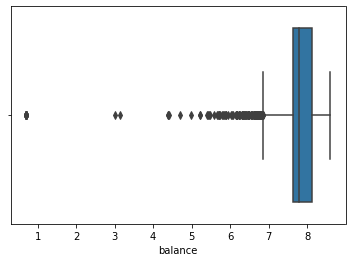

In [23]:
sns.boxplot(x=inp1['balance'])
plt.show()

# Standardising Values

- Standardization (a type of feature scaling) makes your numeric columns:
- Mean = 0
- Standard deviation = 1

- This is important for many machine learning algorithms (like logistic regression, SVM, KNN, neural networks), which are sensitive to scale. You can standardize numeric column but not Boolean or Categorial.



### Duration variable

In [24]:
inp1.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [25]:
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [26]:
inp1.duration.apply(lambda x : float(x.split()[0])/60)

0        4.350000
1        2.516667
2        1.266667
3        1.533333
4        3.300000
           ...   
45206    0.271389
45207    0.126667
45208    0.313056
45209    0.141111
45210    0.100278
Name: duration, Length: 45161, dtype: float64

In [27]:
inp1.duration.apply(lambda x : float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))

0         4.350000
1         2.516667
2         1.266667
3         1.533333
4         3.300000
           ...    
45206    16.283333
45207     7.600000
45208    18.783333
45209     8.466667
45210     6.016667
Name: duration, Length: 45161, dtype: float64

In [28]:
inp1.duration = inp1.duration.apply(lambda x : float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))

In [29]:
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

# Step2: Univariate Analysis

In [30]:
inp1.dtypes

age          float64
salary         int64
balance      float64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

### Marital

In [31]:
inp1.marital.value_counts()

married     27185
single      12778
divorced     5198
Name: marital, dtype: int64

In [32]:
inp1.marital.value_counts(normalize=True) # for percentage vise distribution 

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

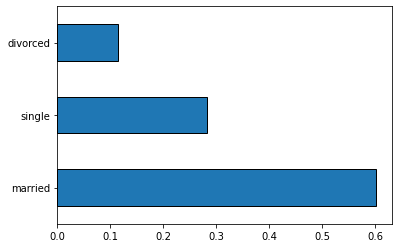

In [33]:
inp1.marital.value_counts(normalize=True).plot.barh(edgecolor ='black') # horizontal bar
plt.show()

### Education

In [34]:
inp1.education.value_counts()

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

In [35]:
inp1.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

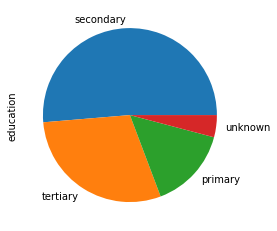

In [36]:
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

# Step 3: Bi-variate analysis

### Numerical-Numerical

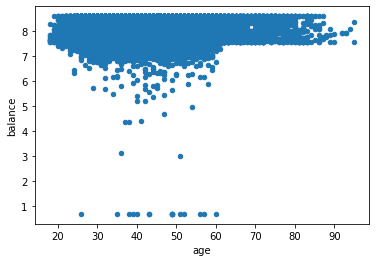

In [37]:
inp1.plot.scatter(x="age", y="balance")
plt.show()

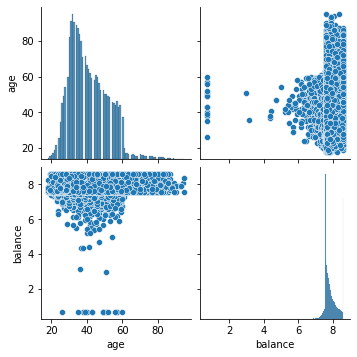

In [38]:
sns.pairplot(data=inp1, vars=["age", "balance"])
plt.show()

### Quantifying using correlation values

In [39]:
inp1[["age","balance"]].corr()  # Double square brackets → multiple columns

,age,balance
age,1.000000,0.106529
balance,0.106529,1.000000


### Correlation heatmap

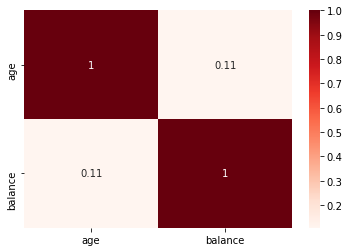

In [40]:
sns.heatmap(inp1[["age", "balance"]].corr(), annot=True, cmap="Reds")
plt.show()

# Correlation vs Causation

## Numerical - Categorical Analysis

In [41]:
inp1.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [42]:
inp1.groupby("response")["salary"].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

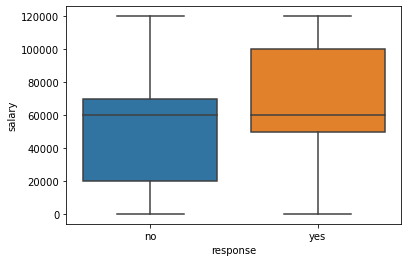

In [43]:
sns.boxplot(data=inp1, x="response", y="salary")
plt.show()

#### Response vs. Balance
we know that balance is highly skewed - has very high values

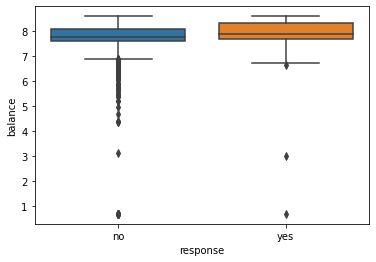

In [44]:
sns.boxplot(data=inp1, x="response", y="balance")
plt.show()

In [45]:
inp1.groupby("response")["balance"].mean() # note the different brackets in groupby function
# round brackets ( ): used for the argument to the groupby() function.
# square brackets [ ]: used for selecting a column from the grouped data.

response
no     7.884147
yes    7.997069
Name: balance, dtype: float64

In [46]:
inp1.groupby("response")["balance"].median()  

response
no     7.775276
yes    7.899895
Name: balance, dtype: float64

#### 75th percentile

In [47]:
def p75(x):
    return np.quantile(x, 0.75)

In [48]:
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,7.884147,7.775276,8.104401
yes,7.997069,7.899895,8.324336


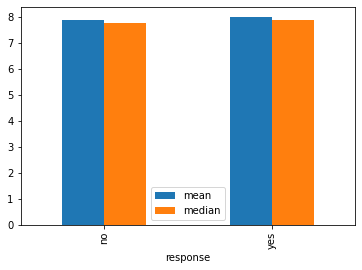

In [49]:
inp1.groupby("response")["balance"].aggregate(["mean","median"]).plot.bar()
plt.show()

# Categorical - Categorical Analysis

In [50]:
inp1["response_flag"] = np.where(inp1.response=="yes",1,0)

In [51]:
inp1.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [52]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [53]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [54]:
inp1.response_flag.mean()

0.1170257523084077

#### Education vs. Response rate

In [55]:
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs. Response rate

In [56]:
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

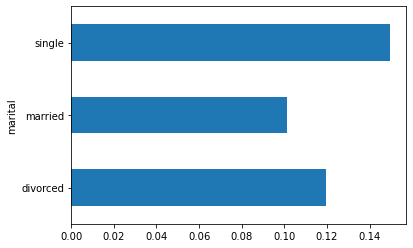

In [57]:
inp1.groupby("marital")["response_flag"].mean().plot.barh()
plt.show()

#### Age Vs. Response

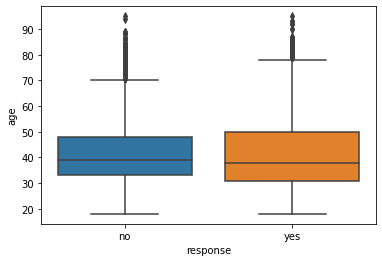

In [58]:
sns.boxplot(data=inp1, x="response", y="age")
plt.show()

#### Making bucket from the age column

In [59]:
pd.cut(inp1.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60", "60+"])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45161, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [60]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [61]:
inp1["age_group"] = pd.cut(inp1.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60", "60+"])

In [62]:
inp1.age_group.value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

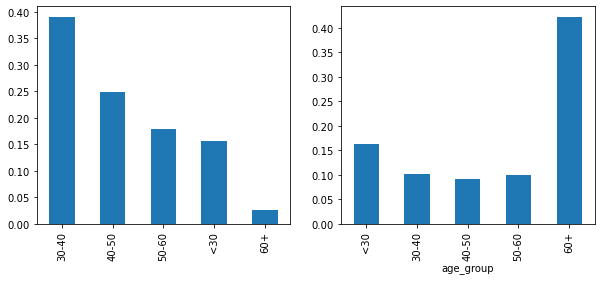

In [63]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])["response_flag"].mean().plot.bar()
plt.show()

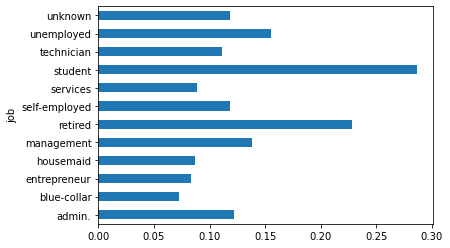

In [64]:
inp1.groupby(["job"])["response_flag"].mean().plot.barh()
plt.show()

# Step 3: Multivariate Analysis

In [65]:
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


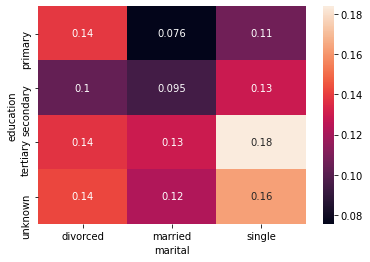

In [66]:
sns.heatmap(res, annot=True)
plt.show()

#### Job vs. Marital Vs. Response

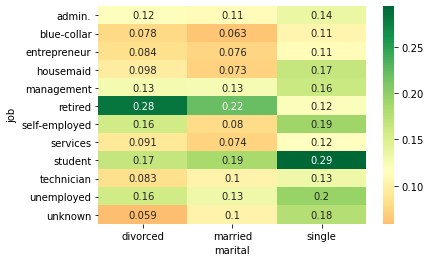

In [67]:
res = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res, annot=True, cmap="RdYlGn", center=0.117)
plt.show()

In [68]:
inp1[inp1.pdays>0].response_flag.mean() # calculating the center value i.e. mean value

0.2307785593014795

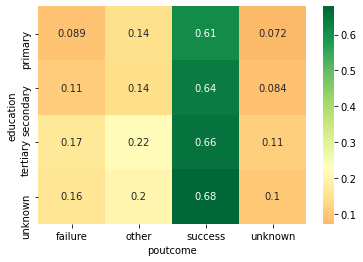

In [69]:
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, annot=True, cmap="RdYlGn", center=0.2306) # inserting the actual center value that is mean.
plt.show()